# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

Sprint 1

Author: Patrick Smith

Date: 07/03/2024

Contact: patrick.b.smith@gmail.com

## Table of Contents

[Inital Discovery/Problem Solving](#discovery) 

[Data Manipulation](#wrangle)

Set to IDs later

## Description of Variables

| Column                    |  Descriptor                     |  Datatype |   
|---------------------------|---------------------------------|-----------|  
| Year                      | Year of observation             |  object   |  
| Quarter                   | Quarter of observation          |  object   |
| Nationality               | Nationality of individual       |  object   |  
| Region                    | Region of observation           |  object   |  
| Return type group         | Type of return                  |  object   |   
| Age                       | Age of individual               |  object   |   
| Return destination group  | Destination of return           |  object   |   
| Number of returns         | Count of returns                |  float64  |   
| Visa type group           | Type of visa                    |  object   |   
| Applicant type            | Type of applicant               |  object   |   
| Case outcome              | Outcome of case                 |  object   |  
| Decisions                 | Number of decisions made        |  float64  |  
| Case type                 | Type of case                    |  object   |  
| Case outcome group        | Group of case outcome           |  object   |  
| Host Country              | Country of host                 |  object   |  
| Application type group    | Type of application grouped    |  object   |  
| Application type          | Type of application            |  object   |  
| Grants                    | Number of grants                |  float64  |  
| Applications              | Number of applications          |  float64  |  
| Occupation                | Occupation of individual       |  object   |  
| Industry                  | Industry of individual         |  object   |  
| Sex_Male                  | Male dummy set to 1-0           |  int32    |  
| Sex_Female                | Female dummy set to 1-0         |  int32    |  
| Sex_Other                 | Other or NAs dummy set to 1-0  |  int32    |


# Defaults 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling & Initial Analysis

<a id = 'wrangle'><a/>

**Initial Notes:**  
**Merging Pathway (7 files)**

#1 returns-clean(13) <-> #2 entries-clean(7) <-> #3 asylum(12) <-> #4 grants(5) <-> #5 asylum_applications(3) <-> #6 applications_jobs(11) <-> #7 grants_jobs(12)

From oldest read data to new 1-2-3-4-5-6, data is pasted on top, so it is 6-5-4-3-2-1 unfiltered.

The merging code (below) takes ~30 seconds - 1 minute to compute, so please wait after running.

In [2]:
# Define the directory path
directory_path = r"C:\Users\patri\Downloads\data"

# Define the file names
returns_file_name = "returns-clean.xlsx"
entries_file_name = "entries-clean.xlsx"
asylum_file_name = "Asylum initial decisions and resettlement-clean.xlsx"
grants_file_name = "Grants of British citizenship-clean.xlsx"
asylum_applications_file_name = "asylum-applications-clean.xlsx"
grants_jobs_file_name = "grants-occupactions-visas-clean.xlsx"
application_jobs_file_name = "applications-occupactions-visas-clean.xlsx"

# Construct the full file paths
returns_file_path = os.path.join(directory_path, returns_file_name)
entries_file_path = os.path.join(directory_path, entries_file_name)
asylum_file_path = os.path.join(directory_path, asylum_file_name)
grants_file_path = os.path.join(directory_path, grants_file_name)
asylum_applications_file_path = os.path.join(directory_path, asylum_applications_file_name)
grants_jobs_file_path = os.path.join(directory_path, grants_jobs_file_name)
application_jobs_file_path = os.path.join(directory_path, application_jobs_file_name)

# Read files and set df variables per sheet
# Specifying specific columns to ensure it pulls the right columns. Without this the combination df was getting multiples of the same columns.
# Picked most columns, decided to drop the non-important ones once the data is analyzed sufficently. 
df_returns = pd.read_excel(returns_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Return type group', 'Return type', 'Age', 'Sex', 'Return destination group', 'Number of returns'])
df_entries = pd.read_excel(entries_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Applicant type', 'Case outcome', 'Decisions'])
df_asylum = pd.read_excel(asylum_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Case type', 'Case outcome group', 'Case outcome', 'Age', 'Sex', 'Applicant type', 'UASC', 'Host Country', 'Decisions'])
df_grants = pd.read_excel(grants_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Application type group', 'Application type', 'Region', 'Nationality', 'Sex', 'Age', 'Grants'])
df_asylum_applications = pd.read_excel(asylum_applications_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex', 'Applicant type', 'UASC', 'Location of application', 'Applications'])
df_grants_jobs = pd.read_excel(grants_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Grants'])
df_application_jobs = pd.read_excel(application_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Applications'])

# Concatenate the dataframes along the rows axis
#I gnore_index is neccesary as the concatenation appeared to be giving different columns and rows based on combined indexes 
df_combined = pd.concat([df_returns, df_entries, df_asylum, df_grants, df_asylum_applications, df_grants_jobs, df_application_jobs], ignore_index=True)

# Sort the dataframe by 'Year' and 'Quarter'
# Almost all these values were populated in all the sheets so useful matching indicators
df_combined.sort_values(by=['Year', 'Quarter'], inplace=True)

# Displaying dataframe(df) in sample
df_combined.head(10)

#REF: ChatGPT


,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Application type,Grants,Location of application,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group
584636,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584637,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584638,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584639,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584640,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584641,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584642,2001,2001 Q1,Afghanistan,Asia Central,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584643,2001,2001 Q1,Albania,Europe Other,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584644,2001,2001 Q1,Albania,Europe Other,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584645,2001,2001 Q1,Albania,Europe Other,NaN,NaN,Total (pre-2009),Total (pre-2009),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the new combined dataset and types.

In [3]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069269 entries, 584636 to 827858
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067885 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Sex                       549050 non-null   object 
 8   Return destination group  237640 non-null   object 
 9   Number of returns         237640 non-null   float64
 10  Visa type group           346994 non-null   object 
 11  Applicant type            525835 non-null   object 
 12  Case outcome              456259 non-null   object 
 13  Decisions                 45

Now checking as a percentage.

In [4]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.129434
Quarter                      0.130089
Nationality                  0.130089
Region                       0.130089
Return type group           77.775471
Return type                 77.775471
Age                         49.397299
Sex                         48.651836
Return destination group    77.775471
Number of returns           77.775471
Visa type group             67.548484
Applicant type              50.822945
Case outcome                57.329821
Decisions                   57.329821
Case type                   89.781337
Case outcome group          89.781337
UASC                        83.274461
Host Country                89.781337
Application type group      87.601530
Application type            88.347366
Grants                      79.704172
Location of application     93.493125
Applications                85.320626
Occupation                  83.930143
Industry                    83.930143
Occ. major group            83.930143
Occ. sub-maj

Looks like we are solid on year, quarter, nationality, and regions. The others need some work. We also need to find the ones that are irrevalent, so we can drop them.

In [5]:
# Get the value counts for the 'Sex' column
df_combined['Sex'].value_counts()

Sex
Male                                 276873
Female                               233991
Total (pre-2009)                      30708
Unknown                                5172
Unknown Sex                            1054
M                                       610
F                                       608
Unknown / Not Given                      24
U                                         7
Data Unavailable in Source System         2
Male                                      1
Name: count, dtype: int64

Would make sense to make to dummy variables and map to 3 different values, male, female, and other. Read like: 1-0-0, 0-1-0, or 0-0-1.

In [6]:
# Define the mapping dictionary
sex_mapping = {'Male': 1, 'Female': 0, 'M': 1, 'F': 0, 'Other': None}

# Apply the mapping to the 'Sex' column in df_combined
df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)

# Convert to dummy variables
df_combined['Sex_Male'] = (df_combined['Sex'] == 1).astype(int)
df_combined['Sex_Female'] = (df_combined['Sex'] == 0).astype(int)
df_combined['Sex_Other'] = df_combined['Sex'].isna().astype(int)

# Print the DataFrame
df_combined.sample(10)

# REF: lesson & ChatGPT

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,...,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Sex_Male,Sex_Female,Sex_Other
200581,2019,2019 Q2,Ghana,Africa Sub-Saharan,Refused entry at port and subsequently departed,Departed from Juxtaposed controls,18 to 29,0.0,EU Member State,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
998522,2021,2021 Q4,Pakistan,Asia South,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2424 - Business and financial project manageme...,"Professional, Scientific and Technical Activities",Professional Occupations,"Business, Media and Public Service Professionals","Business, Research and Administrative Professi...",Business and financial project management prof...,0,0,1
558834,2022,2022 Q3,South Korea,Asia East,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
186809,2018,2018 Q1,Sierra Leone,Africa Sub-Saharan,Voluntary return,Other verified returns,30 to 49,1.0,Home Country,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
277716,2007,2007 Q2,North Macedonia,Europe Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
396580,2013,2013 Q3,"Bahamas, The",America Central and South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
959290,2023,2023 Q1,Portugal,EU 14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6145 - Care workers and home carers,Human Health and Social Work Activities,"Caring, Leisure and Other Service Occupations",Caring Personal Service Occupations,Caring Personal Services,Care workers and home carers,0,0,1
1133,2004,2004 Q1,Latvia,EU 8,Refused entry at port and subsequently departed,N/A - pre-2007,18 to 29,NaN,EU Member State,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
504939,2019,2019 Q3,Sri Lanka,Asia South,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
863609,2016,2016 Q2,Eritrea,Africa Sub-Saharan,NaN,NaN,Under 18,0.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


OK we can drop Sex now that we have created dummies and 3 new collumns successfully

In [7]:
# Drop the 'Sex' column from df_combined
df_combined.drop(columns=['Sex'], inplace=True)

See if it works. Check sample

In [8]:
df_combined.sample(10)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Return destination group,Number of returns,Visa type group,...,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Sex_Male,Sex_Female,Sex_Other
544636,2022,2022 Q1,Estonia,EU 8,NaN,NaN,NaN,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
720200,2008,2008 Q2,Yemen,Middle East,NaN,NaN,70+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
663514,2018,2018 Q3,South Africa,Africa Sub-Saharan,NaN,NaN,18-29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
543996,2022,2022 Q1,Bulgaria,EU 2,NaN,NaN,NaN,NaN,NaN,Visitor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
513641,2020,2020 Q1,Thailand,Asia South East,NaN,NaN,NaN,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
261093,2006,2006 Q2,Sierra Leone,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,Visitor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
354450,2011,2011 Q2,Gabon,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,Visitor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
157863,2016,2016 Q1,Kenya,Africa Sub-Saharan,Voluntary return,Other verified returns,70 and over,Home country,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
620018,2011,2011 Q2,Somalia,Africa Sub-Saharan,NaN,NaN,30-49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
239339,2005,2005 Q1,Kenya,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,Dep. joining or accompanying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


Let's take a look at years and quarters and how it is distributed

In [9]:
df_combined['Year'].value_counts()

Year
2022            113682
2023             94119
2021             81753
2010             52730
2009             52718
2011             50673
2015             49505
2012             49439
2018             49163
2013             49057
2016             48980
2014             48838
2017             48789
2019             48666
2007             42438
2008             42319
2006             39638
2005             37901
2020             36410
2004             13495
2002              4595
2003              4236
2001              3187
2022              3079
2021              2468
End of table         4
End of Table         3
Name: count, dtype: int64

OK looks like the newer the data, the more data samples we have

In [10]:
df_combined['Quarter'].value_counts()

Quarter
2023 Q3    32917
2022 Q3    32498
2022 Q4    30738
2023 Q2    30675
2023 Q1    30527
           ...  
2003 Q3     1017
2001 Q1      868
2001 Q2      783
2001 Q3      774
2001 Q4      762
Name: count, Length: 91, dtype: int64

Quarters are spilt by year so let's take out year because we have another dedicated collumn for this.

In [11]:
# Split the 'Quarter' column into 'Year' and 'Quarter' parts
df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)

# Map the 'Quarter' part to the desired values
quarter_mapping = {'1': 1, '2': 2, '3': 3, '4': 4}
#df_combined['Quarter'] = df_combined['Quarter'].map(quarter_mapping).fillna(5).astype(int)

In [12]:
# Sanity check
df_combined['Quarter'].value_counts()

Quarter
3    291130
1    264691
2    263994
4    248063
Name: count, dtype: int64

In [13]:
df_combined['Year'].value_counts()

Year
2022    116761
2023     94119
2021     84221
2010     52730
2009     52718
2011     50673
2015     49505
2012     49439
2018     49163
2013     49057
2016     48980
2014     48838
2017     48789
2019     48666
2007     42438
2008     42319
2006     39638
2005     37901
2020     36410
2004     13495
2002      4595
2003      4236
2001      3187
Name: count, dtype: int64

The missing data for year, quarter, nationality, and region are the same. So maybe they are all nans. Let's check this.

In [14]:
# Filter rows where 'Year' column is null or NaN
df_combined[df_combined['Year'].isnull()]

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Return destination group,Number of returns,Visa type group,...,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Sex_Male,Sex_Female,Sex_Other
584635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
981881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1069268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
237640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
693901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
827855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
827856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
827857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [15]:
# Count the rows where 'Year' column is null or NaN
missing_year_count = df_combined['Year'].isnull().sum()

# Display the count
print("Number of rows without year inputs:", missing_year_count)

Number of rows without year inputs: 1391


ok we can just remove all the rows with no year because there is no data

In [16]:
# Remove rows with null values in the "Year" column
df_combined = df_combined.dropna(subset=['Year'])

# Check the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_combined.shape)

Shape of cleaned DataFrame: (1067878, 31)


In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067878 entries, 584636 to 824046
Data columns (total 31 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067878 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Return type               237640 non-null   object 
 6   Age                       541079 non-null   object 
 7   Return destination group  237640 non-null   object 
 8   Number of returns         237640 non-null   float64
 9   Visa type group           346994 non-null   object 
 10  Applicant type            525835 non-null   object 
 11  Case outcome              456259 non-null   object 
 12  Decisions                 456259 non-null   float64
 13  Case type                 10

In [18]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           77.746522
Return type                 77.746522
Age                         49.331384
Return destination group    77.746522
Number of returns           77.746522
Visa type group             67.506213
Applicant type              50.758888
Case outcome                57.274239
Decisions                   57.274239
Case type                   89.768026
Case outcome group          89.768026
UASC                        83.252675
Host Country                89.768026
Application type group      87.585380
Application type            88.332188
Grants                      79.677735
Location of application     93.484649
Applications                85.301504
Occupation                  83.909211
Industry                    83.909211
Occ. major group            83.909211
Occ. sub-major group        83.909211
Occ. minor g

OK we are good for the top 4 now and it has reduced the nulls overall by ~ 1400

Let's move on to Case outcome, which will likely be our most important dependent variable.

In [19]:
# display value counts for case outcome
df_combined['Case outcome'].value_counts()

Case outcome
Issued                                                                           198448
Refused                                                                          101804
Withdrawn                                                                         38253
Other Refusals                                                                    31930
Refugee Permission                                                                21704
Other Withdrawal                                                                  14763
Certified Refusal                                                                  9770
Lapsed                                                                             8489
3rd Country Refusal                                                                5738
Discretionary Leave                                                                5007
Non-Substantiated Withdrawal                                                       4193
Non-Compliance Refu

OK there are a lot of options but most can be clustered to 5 variables. We are going to choose: Refugee permission, Issued, Refused, Withdrawn, and Resettlements.

Below is a map to these 5 variables, then after we fill the NA for the other variables with no info.

In [20]:
# Create a dictionary to map similar values to main categories
outcome_mapping = {
    'Refugee Permission': ['Refugee Permission', 'Temporary Refugee Permission'],
    'Issued': ['Issued', 'Humanitarian Protection'],
    'Refused': ['Refused', 'Certified Refusal', '3rd Country Refusal', 'Non-Compliance Refusal'],
    'Withdrawn': ['Withdrawn', 'Lapsed', 'Other Withdrawal', 'Non-Substantiated Withdrawal'],
    'Resettlements': [
        'Resettlement - Gateway Protection Programme',
        'Resettlement - UK Resettlement Scheme',
        'Resettlement - Vulnerable Children Resettlement Scheme',
        'Resettlement - Vulnerable Persons Resettlement Scheme',
        'Resettlement - Community Sponsorship Scheme',
        'Resettlement - Mandate Scheme',
        'Resettlement - ACRS Pathway 1 - Settled accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation',
        'Resettlement - ACRS Pathway 3 - Settled accommodation',
        'Relocation - ARAP - Settled accommodation',
        'Resettlement - ACRS Pathway 1 - Settled accommodation - Community Sponsorship',
        'Calais Leave',
        'Resettlement - Afghan route not recorded - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Interim accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Settled accommodation'
    ]
}

# Initialize an empty list to store the values not mapped to any category
other_values = []

# Iterate over the unique values in the 'Case outcome' column
for value in df_combined['Case outcome'].unique():
    # Check if the value is not found in any of the main categories
    if all(value not in similar_values for similar_values in outcome_mapping.values()):
        # Add the value to the list of other values
        other_values.append(value)

# Map the other values to the "Other" category
outcome_mapping['Other.NA'] = other_values

# Apply the mapping to the 'Case outcome' column using .loc
for main_category, similar_values in outcome_mapping.items():
    df_combined.loc[df_combined['Case outcome'].isin(similar_values), 'Case outcome'] = main_category

#REF: ChatGPT

Leaving it set to Other.NA for now, but I'm considering changing it to something more sophisicated later.

In [21]:
#displaying value counts for case outcome. See if it works
df_combined['Case outcome'].value_counts()

Case outcome
Other.NA              654990
Issued                201171
Refused               120608
Withdrawn              65698
Refugee Permission     21780
Resettlements           3631
Name: count, dtype: int64

In [22]:
#take a look at the display
df_combined.sample(10)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Return destination group,Number of returns,Visa type group,...,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,Sex_Male,Sex_Female,Sex_Other
659907,2018,1,Philippines,Asia South East,NaN,NaN,30-49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1058679,2023,2,Singapore,Asia South East,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3534 - Finance and investment analysts and adv...,Education,Associate Professional and Technical Occupations,Business and Public Service Associate Professi...,"Business, Finance and Related Associate Profes...",Finance and investment analysts and advisers,0,0,1
436897,2015,3,Syria,Middle East,NaN,NaN,NaN,NaN,NaN,Work,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1004888,2021,4,Tanzania,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,9233 - Cleaners and domestics,Activities of extraterritorial organisations a...,Elementary Occupations,Elementary Administration and Service Occupations,Elementary Cleaning Occupations,Cleaners and domestics,0,0,1
838700,2009,2,Congo,Africa Sub-Saharan,NaN,NaN,18-29,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
367530,2011,4,Turkey,Europe Other,NaN,NaN,NaN,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
288284,2008,1,Botswana,Africa Sub-Saharan,NaN,NaN,NaN,NaN,NaN,Work,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
87622,2011,1,Algeria,Africa North,Voluntary return,Controlled returns,30 to 49,EU Member State,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
508952,2019,4,Russia,Europe Other,NaN,NaN,NaN,NaN,NaN,Work,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
688337,2022,4,Yemen,Middle East,NaN,NaN,30-49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


Let's plot case outcome to see what it looks like, distributed over time

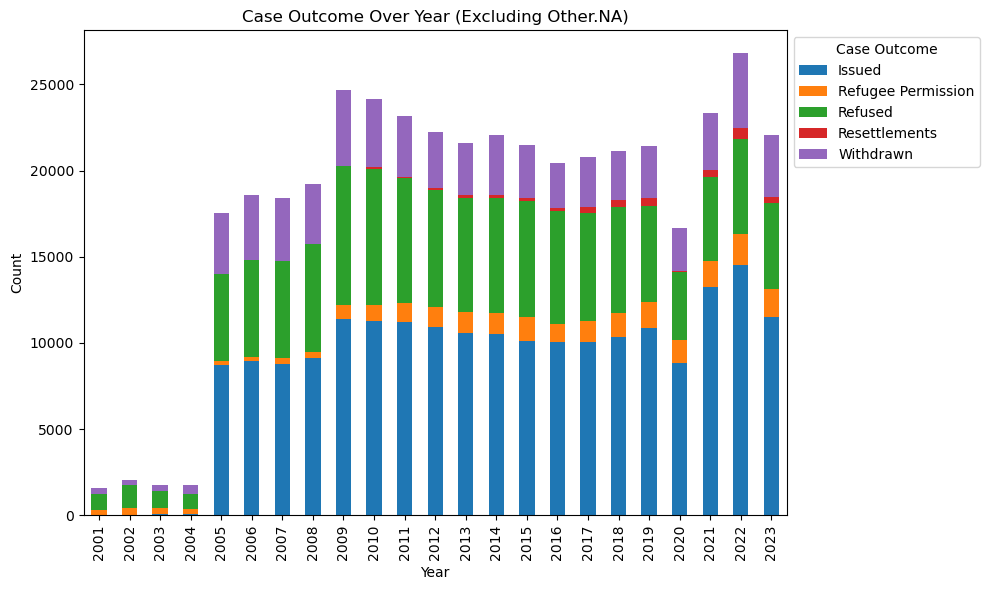

In [23]:
# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Case Outcome Over Year (Excluding Other.NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.tight_layout()

#REF: ChatGPT for !=

OK this is useful but we should normalize the data so we compare it better relatively speaking.

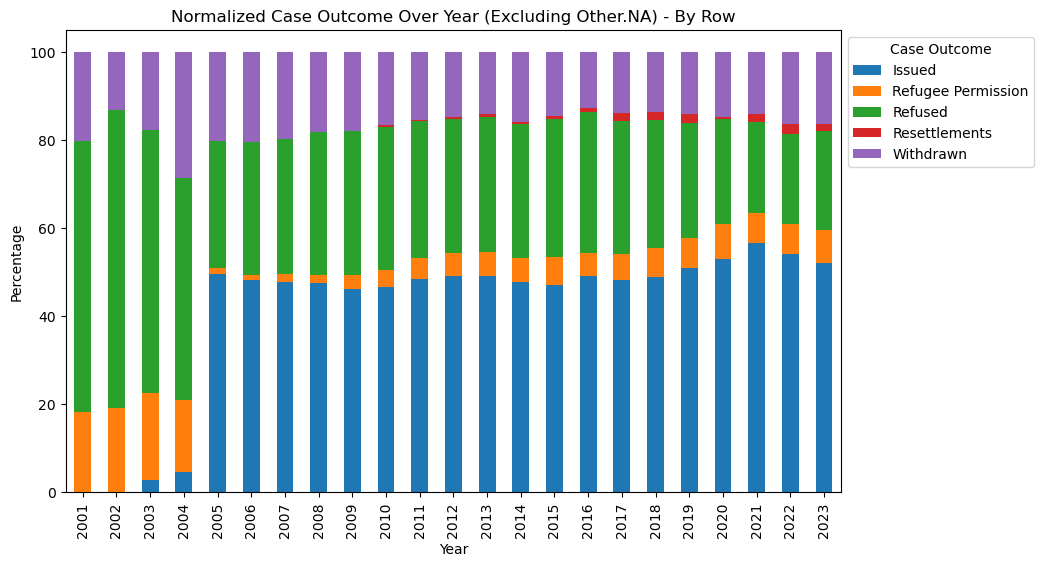

In [24]:
# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Normalize by row (percentage of each year's total)
outcome_counts_norm_row = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Normalize by column (percentage of each case outcome's total)
outcome_counts_norm_col = outcome_counts.div(outcome_counts.sum(axis=0), axis=1) * 100

# Plot the normalized data
outcome_counts_norm_row.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Case Outcome Over Year (Excluding Other.NA) - By Row')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

#REF: ChatGPT

There was a general election in 2005 where immigration was one of the main political discussions.

"The tough stuff worked, in the sense that fewer people applied for asylum in 2004 than in any year since 1998 (whether the system had got any better at sifting genuine claims from false ones is less certain). Reduced numbers, in turn, meant a calmer electorate. Polls by MORI, a pollster, show that the proportion of Britons citing immigration and race as one of the two most important issues facing the nation declined gradually from a pre-campaign peak of 39% in May 2002 to 26% in January 2005. It then shot up again when Labour and the Tories unveiled their policies."


REF: https://www.encyclopedia.com/humanities/applied-and-social-sciences-magazines/uk-immigration-and-2005-general-election

Checking values

In [25]:
df_combined['Case outcome group'].value_counts()

Case outcome group
Refused                 52126
Grant of Protection     28358
Withdrawn               19683
Grant of Other Leave     9098
Name: count, dtype: int64

OK now let's investigate Case outcomes in comparison to Nationality (countries). There are more than 200 countries so let's take top 50 so its more digestable.

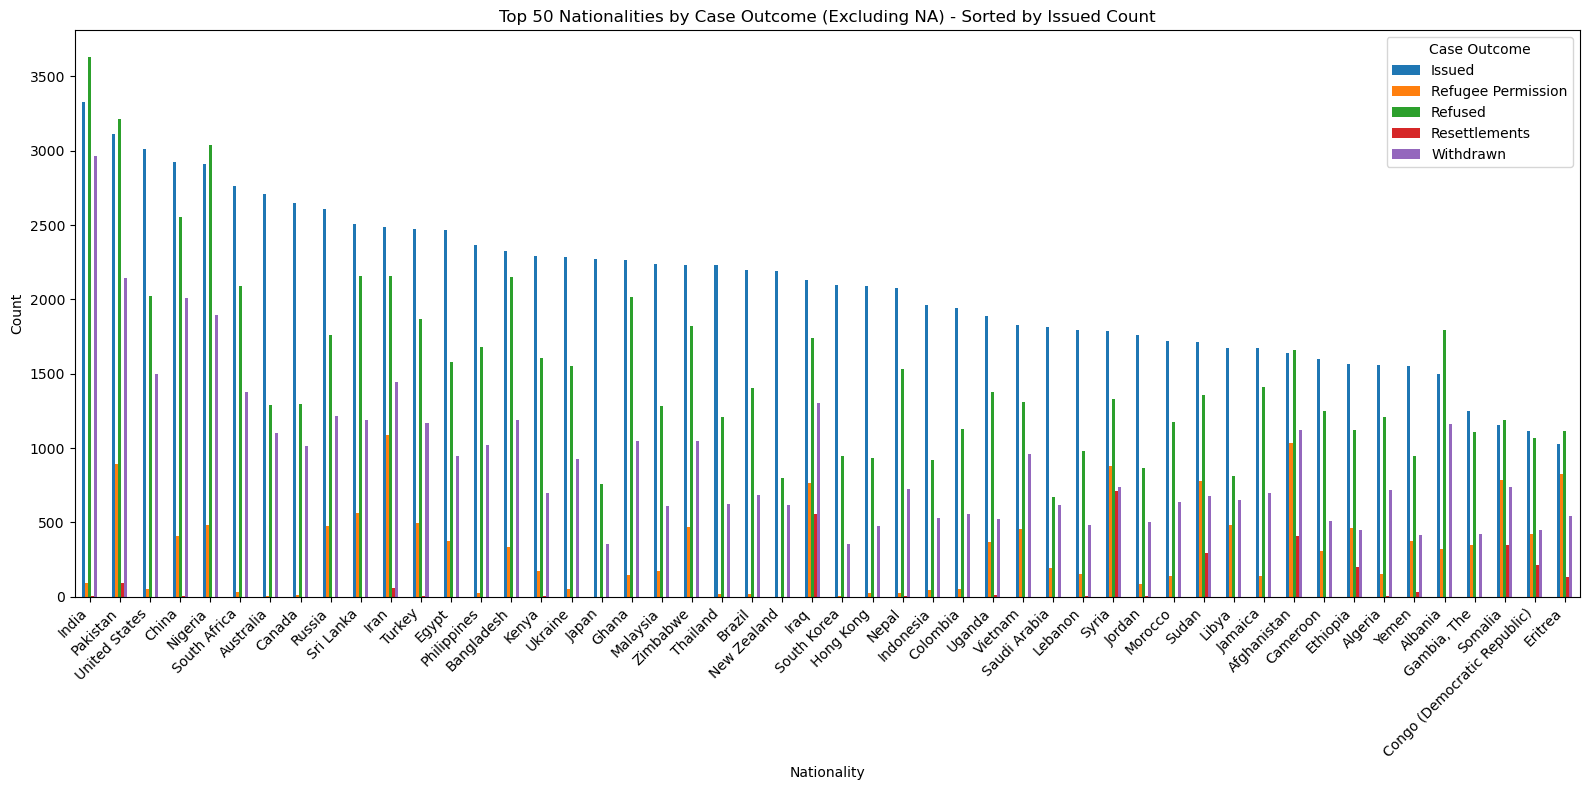

In [26]:
# Filter the dataframe to exclude rows where 'Case outcome' is 'NA'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Nationality' and 'Case outcome' and count occurrences
grouped_counts = filtered_df.groupby(['Nationality', 'Case outcome']).size().unstack(fill_value=0)

# Get the top 50 nationalities by total count across all case outcomes
top_50_nationalities = grouped_counts.sum(axis=1).nlargest(50).index

# Filter the grouped counts dataframe to include only the top 50 nationalities
grouped_counts_top_50 = grouped_counts.loc[top_50_nationalities]

# Sort the data by the "Issued" count in descending order
grouped_counts_top_50_sorted = grouped_counts_top_50.sort_values(by='Issued', ascending=False)

# Plot the sorted data
grouped_counts_top_50_sorted.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Top 50 Nationalities by Case Outcome (Excluding NA) - Sorted by Issued Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#REF: ChatGPT

OK this is interesting. We can notice some interesting displays in the data. Some have high numbers of resettlements. These appear to all be autocratic nations (Iraq, Syria, Afghanistan, etc.)

There was a big war in the 2000s when the US invaded to topple Sadam Hussein. So let's just look at Iraq over time and see what it tells us.

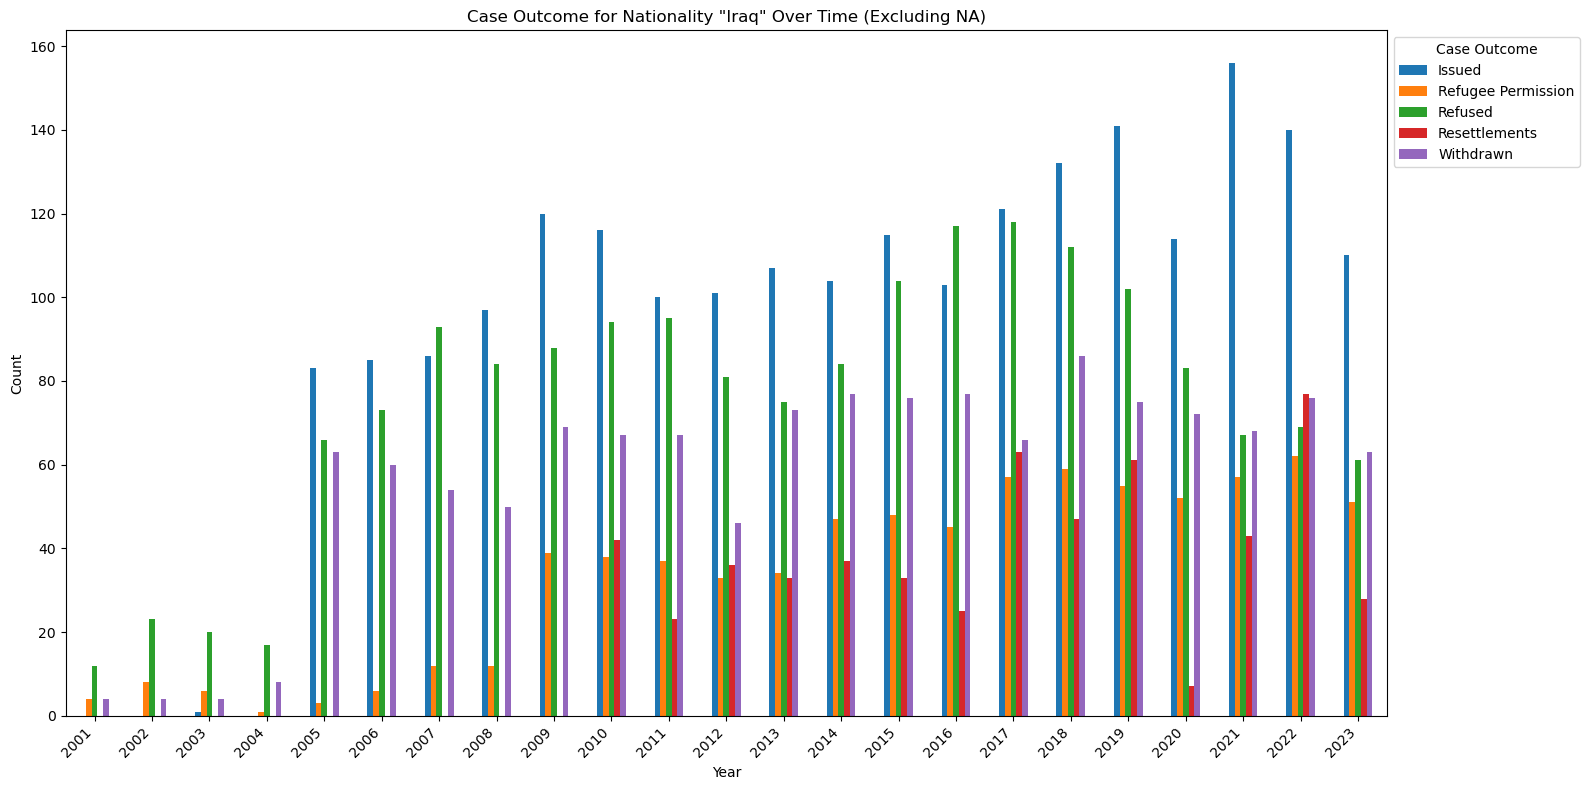

In [27]:
# Filter the dataframe to include only rows where 'Nationality' is 'Iraq' and 'Case outcome' is not 'Other.NA'
filtered_df_iraq = df_combined[(df_combined['Nationality'] == 'Iraq') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_iraq = filtered_df_iraq.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_iraq.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Iraq" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

"The Iraq War (Arabic: حرب العراق, romanized: ḥarb ālʿirāq) was a protracted armed conflict in Iraq from 2003 to 2011. It began with the invasion of Iraq by the United States-led coalition that overthrew the Ba'athist government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. US troops were officially withdrawn in 2011."

REF: https://en.wikipedia.org/wiki/Iraq_War

In this time/Case outcome barplot, we can see that during the later years of the war, the UK stepped up its resettlements and it trends higher until 2022. The data appears to tell these types of stories on a case by case basis!

Let's try Syria.

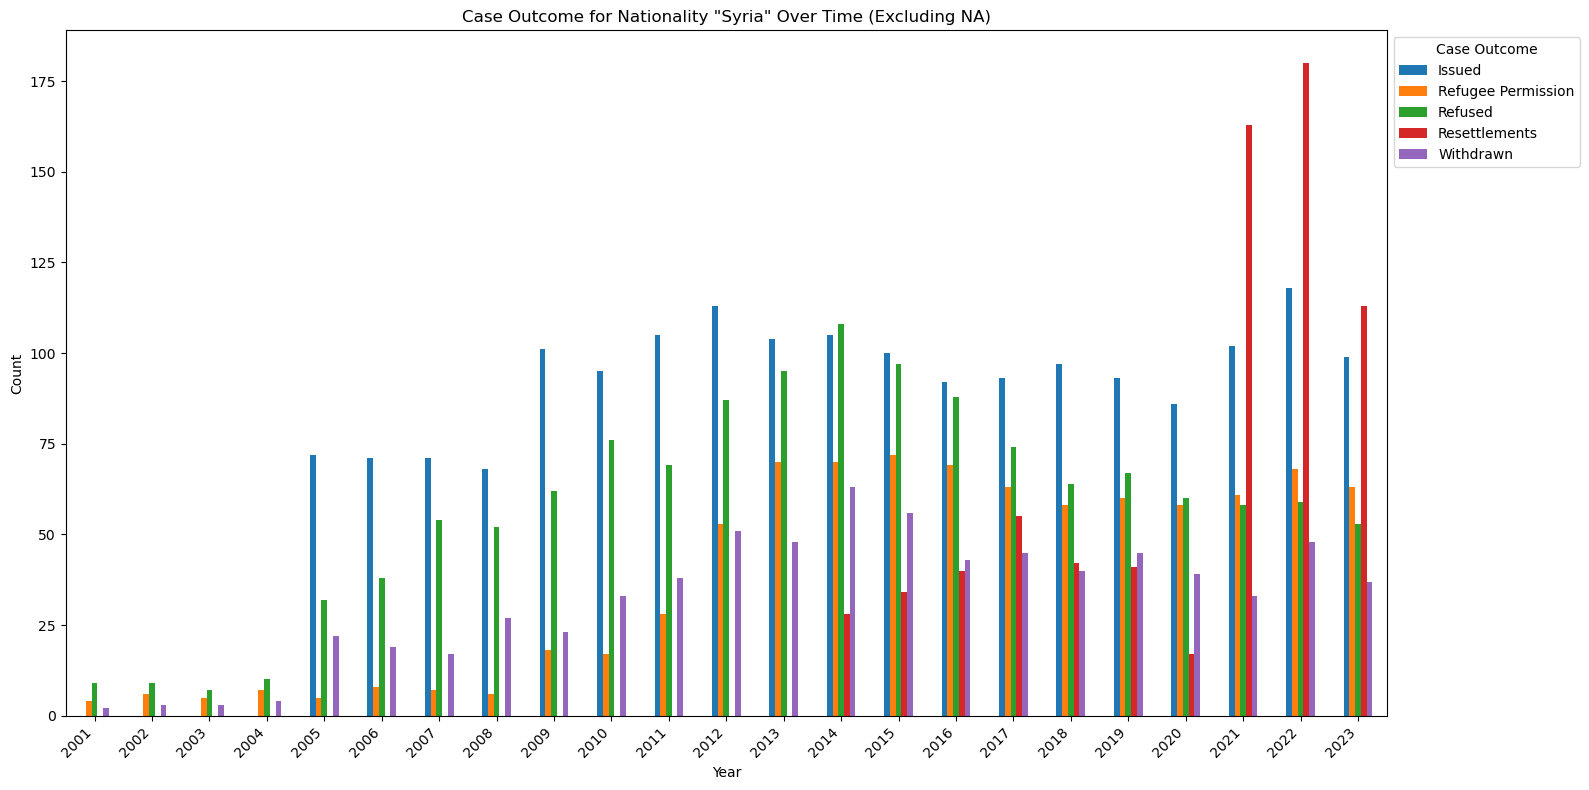

In [28]:
# Filter the dataframe to include only rows where 'Nationality' is 'Syria' and 'Case outcome' is not 'Other.NA'
filtered_df_syria = df_combined[(df_combined['Nationality'] == 'Syria') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_syria = filtered_df_syria.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_syria.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Syria" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

"The Syrian civil war (Arabic: ٱلْحَرْبُ ٱلْأَهْلِيَّةُ ٱلسُّورِيَّةُ, romanized: al-ḥarb al-ʾahlīyah al-sūrīyah) is an ongoing multi-sided conflict in Syria involving various state-sponsored and non-state actors. In March 2011, popular discontent with the rule of Bashar al-Assad triggered large-scale protests and pro-democracy rallies across Syria, as part of the wider Arab Spring protests in the region. After months of crackdown by governments security apparatus, various armed rebel groups such as the Free Syrian Army began forming across the country, marking the beginning of the Syrian insurgency. By mid-2012, the crisis had escalated into a full-blown civil war.

Receiving arms from NATO and GCC states, rebel forces initially made significant advances against the government forces, who were receiving arms from Iran and Russia. Rebels captured the regional capitals of Raqqa in 2013 and Idlib in 2015. Consequently, in September 2015, Russia launched a military intervention in support of the government, shifting the balance of the conflict. By late 2018, all rebel strongholds, except parts of Idlib region, had fallen to the government forces."

REF: https://en.wikipedia.org/wiki/Syrian_civil_war

In this situation, resetttlment movement really stepped up after a heighted occupation from Rebels backed by Iran and Russia in 2023-2025. in 2021-2013 these numbers really jumped up. Maybe due to a new law to take in more refugees? Some additional questions to investigate.

OK now let's analyze top 50 nationalities (countries) and compare it to case outcomes to see any trends or patterns. We can calculate a ratio of issued over rejected.

In [29]:
# Step 1: Filter the dataframe to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index

# Step 2: Iterates for top 50. Calculates counts for refused, withdrawn, issued, and refugee permission cases for each nationality
rejection_data = []
for nationality in top_50_nationalities:
    nationality_data = df_combined[df_combined['Nationality'] == nationality]
    refused_count = nationality_data[nationality_data['Case outcome'] == 'Refused'].shape[0]
    withdrawn_count = nationality_data[nationality_data['Case outcome'] == 'Withdrawn'].shape[0]
    issued_count = nationality_data[nationality_data['Case outcome'] == 'Issued'].shape[0]
    refugee_permission_count = nationality_data[nationality_data['Case outcome'] == 'Refugee Permission'].shape[0]
    
    # Step 3: Calculates total - issued + refugee permission 
    total_issued_refugee_permission = issued_count + refugee_permission_count

    # Step 4: Calculates total - total refused + withdrawn
    total_refused_withdrawn = refused_count + withdrawn_count
    
    # Step 5: Calculate the rejection ratio
    rejection_ratio = round((refused_count / total_issued_refugee_permission), 2)

    # Step 6: Calculate the total rejection ratio (including withdrawals)
    total_rejection_ratio = round((total_refused_withdrawn / total_issued_refugee_permission), 2)
    
    # Step 7: Append the data to the list
    rejection_data.append((nationality, refused_count, withdrawn_count, issued_count, refugee_permission_count, total_issued_refugee_permission, rejection_ratio, total_rejection_ratio))

# Display the results in a DataFrame
rejection_df = pd.DataFrame(rejection_data, columns=['Nationality', 'Refused', 'Withdrawn', 'Issued', 'Refugee Permission', 'Total Issued + Refugee Permission', 'Rejection Ratio', 'Total Rejection Ratio'])
rejection_df

#REF: ChatGPT

,Nationality,Refused,Withdrawn,Issued,Refugee Permission,Total Issued + Refugee Permission,Rejection Ratio,Total Rejection Ratio
0,India,3628,2964,3330,94,3424,1.06,1.93
1,Pakistan,3214,2143,3115,894,4009,0.80,1.34
2,United States,2023,1500,3013,55,3068,0.66,1.15
3,Nigeria,3037,1897,2913,480,3393,0.90,1.45
4,China,2557,2011,2926,410,3336,0.77,1.37
5,South Africa,2088,1378,2763,35,2798,0.75,1.24
6,Turkey,1869,1168,2471,497,2968,0.63,1.02
7,Iran,2154,1443,2485,1090,3575,0.60,1.01
8,Sri Lanka,2154,1190,2509,561,3070,0.70,1.09
9,Russia,1758,1217,2608,476,3084,0.57,0.96


Note that rejection ratio is exclusive of withdrawals, which could be voluntary. Total rejection includes withdrawls, so the ratio is higher in all cases.

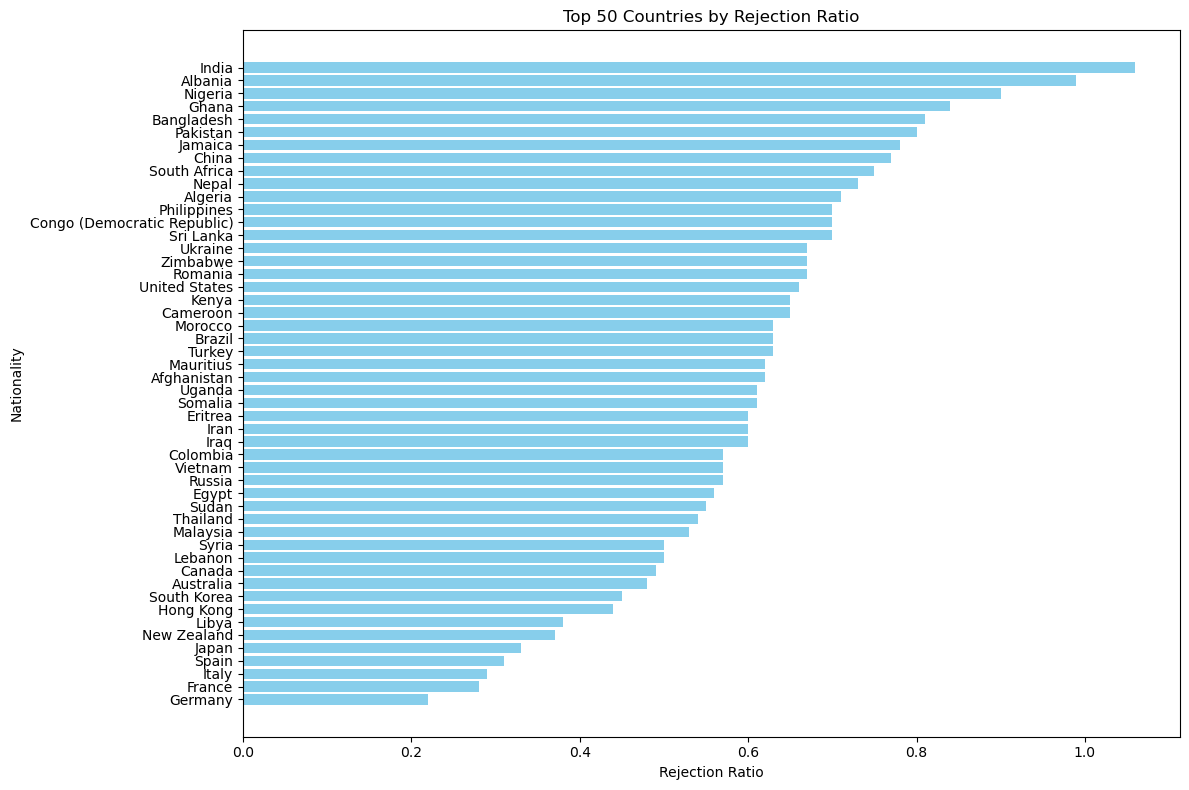

In [30]:
# Sort the rejection data by rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Rejection Ratio'], color='skyblue')
plt.xlabel('Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rejection ratio at the top
plt.tight_layout()
plt.show()

#REF: ChatGPT

OK so we can see a top 50 country by rejection ratio.

The distribution of data looks solid and appears uunderstandable. Western countries or those that are more democratic are on the lower end, whereas in general, more autocratic have a higher chance of rejection.

Now let's look into return type, return type group, application type, and location of country.

In [31]:
df_combined['Return type'].value_counts()

Return type
Departed from UK Ports               50605
Other verified returns               49411
Controlled returns                   35126
Departed from Juxtaposed controls    26261
Assisted returns                     16244
Enforced removals                    15657
Enforced removals from detention     15639
N/A - pre-2007                       14511
Other returns from detention          4998
Not available                         4306
Non-detained Enforced removals        3728
Non-detained enforced removals        1154
Name: count, dtype: int64

In [32]:
df_combined['Return type group'].value_counts()

Return type group
Voluntary return                                   100781
Refused entry at port and subsequently departed     95683
Enforced return                                     41176
Name: count, dtype: int64

Return type group is already filtered, so we can drop Return type

In [33]:
# Drop the 'Return type' column from df_combined
df_combined.drop(columns=['Return type'], inplace=True)

In [34]:
df_combined['Applicant type'].value_counts()

Applicant type
Main Applicant        265780
All                   136241
Dependant             116416
Resettlement - N/A      3855
Main applicant          3543
Name: count, dtype: int64

In [35]:
df_combined['Location of application'].value_counts()

Location of application
In Country    48055
At Port       21521
Name: count, dtype: int64

This is not neccesary for anything. Drop.

In [36]:
# Drop the 'Location of application' column from df_combined
df_combined.drop(columns=['Location of application'], inplace=True)

This might be helpful for 'Asylum case' - to compare with 'Nationality'

OK now let's look at industry, occupation, occ. major group, occ. sub-major group, and occ.minor group, and occ. unit group.

In [37]:
df_combined['Industry'].value_counts()

Industry
Professional, Scientific and Technical Activities                                        31042
Education                                                                                16535
Financial and Insurance Activities                                                       16028
Information and Communications                                                           15254
Human Health and Social Work Activities                                                  15190
Manufacturing                                                                            15170
Arts, Entertainment and Recreation                                                       12976
Administrative and Support Service Activities                                             8085
Wholesale and retail trade; repair of motor vehicles and motorcycles                      7143
Other Service Activities                                                                  6806
Construction                             

In [38]:
df_combined['Occupation'].value_counts()

Occupation
2136 - Programmers and software development professionals        7861
2423 - Management consultants and business analysts              7012
3545 - Sales accounts and business development managers          5691
3534 - Finance and investment analysts and advisers              4510
2135 - IT business analysts, architects and systems designers    4500
                                                                 ... 
2441 - Public service administrative professionals                  2
3551 - Conservation and environmental protection officers           2
6215 - Rail travel assistants                                       2
9259 - Elementary sales occupations n.e.c.                          1
9231 - Window cleaners                                              1
Name: count, Length: 324, dtype: int64

Industry has better info than this. We can remove Occ. major group

In [39]:
# Drop the 'Occ. major group' column from df_combined
df_combined.drop(columns=['Occ. major group'], inplace=True)

In [40]:
df_combined['Occ. sub-major group'].value_counts()

Occ. sub-major group
Science, Research, Engineering and Technology Professionals    42044
Business, Media and Public Service Professionals               30204
Business and Public Service Associate Professionals            25956
Corporate Managers and Directors                               19627
Culture, Media and Sports Occupations                          11047
Health Professionals                                           10591
Caring Personal Service Occupations                             5209
Textiles, Printing and Other Skilled Trades                     3620
Science, Engineering and Technology Associate Professionals     3399
Teaching and Educational Professionals                          3384
Health and Social Care Associate Professionals                  2637
Other Managers and Proprietors                                  2438
Administrative Occupations                                      2353
Skilled Metal, Electrical and Electronic Trades                 2325
Skilled Agric

Industry is better. Remove this.

In [41]:
# Drop the 'Occ. sub-major group' column from df_combined
df_combined.drop(columns=['Occ. sub-major group'], inplace=True)

In [42]:
df_combined['Occ. minor group'].value_counts()

Occ. minor group
Information Technology and Telecommunications Professionals    18653
Business, Research and Administrative Professionals            16217
Engineering Professionals                                      14024
Sales, Marketing and Related Associate Professionals           12003
Business, Finance and Related Associate Professionals          10998
                                                               ...  
Conservation Associate Professionals                               2
Therapists                                                         2
Protective Service Officers                                        2
Business and Statistical Professionals                             2
Elementary Sales Occupations                                       1
Name: count, Length: 97, dtype: int64

'Occupaction' looks better. This appears redundant. Drop

In [43]:
# Drop the 'Occ. minor group' column from df_combined
df_combined.drop(columns=['Occ. minor group'], inplace=True)

In [44]:
df_combined['Occ. unit group'].value_counts()

Occ. unit group
Programmers and software development professionals        7861
Management consultants and business analysts              7012
Sales accounts and business development managers          5691
Finance and investment analysts and advisers              4510
IT business analysts, architects and systems designers    4500
                                                          ... 
Management accountants                                       2
Security managers                                            2
Rail travel assistants                                       2
Window cleaners                                              1
Elementary sales occupations n.e.c.                          1
Name: count, Length: 320, dtype: int64

In [45]:
# Again, same as occupaction. Can drop.
# Drop the 'Occ. unit group' column from df_combined
df_combined.drop(columns=['Occ. unit group'], inplace=True)

In [46]:
df_combined.sample(30)

#evident that grants and applications are the same and should be combined
#age ranges
#location of application - can number or remove



,Year,Quarter,Nationality,Region,Return type group,Age,Return destination group,Number of returns,Visa type group,Applicant type,...,Host Country,Application type group,Application type,Grants,Applications,Occupation,Industry,Sex_Male,Sex_Female,Sex_Other
347512,2010,4,Tunisia,Africa North,NaN,NaN,NaN,NaN,Other,All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
27100,2006,3,Romania,EU 2,Voluntary return,18 to 29,Home country,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
301761,2008,4,Canada,America North,NaN,NaN,NaN,NaN,Visitor,All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
276935,2007,2,Japan,Asia East,NaN,NaN,NaN,NaN,Other,Main Applicant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
882728,2020,4,Djibouti,Africa Sub-Saharan,NaN,30-49,NaN,NaN,NaN,Main Applicant,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,0,0
40714,2007,3,Tanzania,Africa Sub-Saharan,Refused entry at port and subsequently departed,18 to 29,EU Member State,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
52928,2008,3,Hong Kong,Asia East,Voluntary return,18 to 29,Other country,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
753287,2012,3,Iran,Middle East,NaN,Under 18,NaN,NaN,NaN,NaN,...,NaN,Registration,Registration of minor children,46.0,NaN,NaN,NaN,0,1,0
847495,2011,4,Nigeria,Africa Sub-Saharan,NaN,50-69,NaN,NaN,NaN,Main Applicant,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0,1,0
931588,2022,2,Slovakia,EU 8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,2119 - Natural and social science professional...,Education,0,0,1


In [47]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067878 entries, 584636 to 824046
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Year                      1067878 non-null  object 
 1   Quarter                   1067878 non-null  object 
 2   Nationality               1067878 non-null  object 
 3   Region                    1067878 non-null  object 
 4   Return type group         237640 non-null   object 
 5   Age                       541079 non-null   object 
 6   Return destination group  237640 non-null   object 
 7   Number of returns         237640 non-null   float64
 8   Visa type group           346994 non-null   object 
 9   Applicant type            525835 non-null   object 
 10  Case outcome              1067878 non-null  object 
 11  Decisions                 456259 non-null   float64
 12  Case type                 109265 non-null   object 
 13  Case outcome group        10

ENDING FOR NOW

In [48]:
# Assuming df_combined is your DataFrame containing the columns 'Grants' and 'Applications'

# Fill NaN values with 0 in both 'Grants' and 'Applications' columns
#df_combined['Grants'].fillna(0, inplace=True)
#df_combined['Applications'].fillna(0, inplace=True)
#df_combined['Decisions'].fillna(0, inplace=True)

# Concatenate the two numerical columns into a new column named 'Total'
#df_combined['Total Grants & Applications & Decisions'] = df_combined['Grants'] + df_combined['Applications'] + df_combined['Decisions']



In [ ]:
df_combined.drop(columns=['Decisions'], inplace=True)

In [ ]:
df_combined.sample(30)

In [ ]:
df_combined.info()

In [ ]:
df_combined['Decisions'].value_counts()

In [ ]:
df_combined['Grants'].value_counts()

In [ ]:
df_combined['Applications'].value_counts()

In [ ]:
#sanity check
df_combined['Total Grants & Applications & Decisions'].value_counts()